In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [163]:
df = pd.read_csv("ToyotaCorolla.csv", encoding='latin1', index_col=0)
df.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


In [164]:
df.drop(columns=['Model'], inplace=True)
df.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,13500,23,10,2002,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
2,13750,23,10,2002,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
3,13950,24,9,2002,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
4,14950,26,7,2002,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
5,13750,30,3,2002,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             1436 non-null   int64 
 1   Age_08_04         1436 non-null   int64 
 2   Mfg_Month         1436 non-null   int64 
 3   Mfg_Year          1436 non-null   int64 
 4   KM                1436 non-null   int64 
 5   Fuel_Type         1436 non-null   object
 6   HP                1436 non-null   int64 
 7   Met_Color         1436 non-null   int64 
 8   Color             1436 non-null   object
 9   Automatic         1436 non-null   int64 
 10  cc                1436 non-null   int64 
 11  Doors             1436 non-null   int64 
 12  Cylinders         1436 non-null   int64 
 13  Gears             1436 non-null   int64 
 14  Quarterly_Tax     1436 non-null   int64 
 15  Weight            1436 non-null   int64 
 16  Mfr_Guarantee     1436 non-null   int64 
 17  BOVAG_Guarante

In [166]:
df.describe()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
df.isnull().sum()

Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [168]:
print(df.corr())

                     Price  Age_08_04  Mfg_Month  Mfg_Year        KM  \
Price             1.000000  -0.876590  -0.018138  0.885159 -0.569960   
Age_08_04        -0.876590   1.000000  -0.123255 -0.983661  0.505672   
Mfg_Month        -0.018138  -0.123255   1.000000 -0.057416 -0.020630   
Mfg_Year          0.885159  -0.983661  -0.057416  1.000000 -0.504974   
KM               -0.569960   0.505672  -0.020630 -0.504974  1.000000   
HP                0.314990  -0.156622  -0.039312  0.164697 -0.333538   
Met_Color         0.108905  -0.108150   0.030266  0.103310 -0.080503   
Automatic         0.033081   0.031717   0.009146 -0.033567 -0.081854   
cc                0.126389  -0.098084   0.037387  0.091892  0.102683   
Doors             0.185326  -0.148359  -0.012069  0.151442 -0.036197   
Cylinders              NaN        NaN        NaN       NaN       NaN   
Gears             0.063104  -0.005364  -0.013063  0.007766  0.015023   
Quarterly_Tax     0.219197  -0.198431   0.031373  0.193934  0.27

C:\Users\amalp\AppData\Local\Temp\ipykernel_11152\4212406737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [169]:
df.drop(columns=['Mfg_Month', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'Airbag_1', 'Tow_Bar', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Airbag_2'], inplace=True)
df.columns

Index(['Price', 'Age_08_04', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP', 'Color',
       'Cylinders', 'Weight', 'ABS', 'Airco', 'Automatic_airco',
       'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows'],
      dtype='object')

C:\Users\amalp\AppData\Local\Temp\ipykernel_11152\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

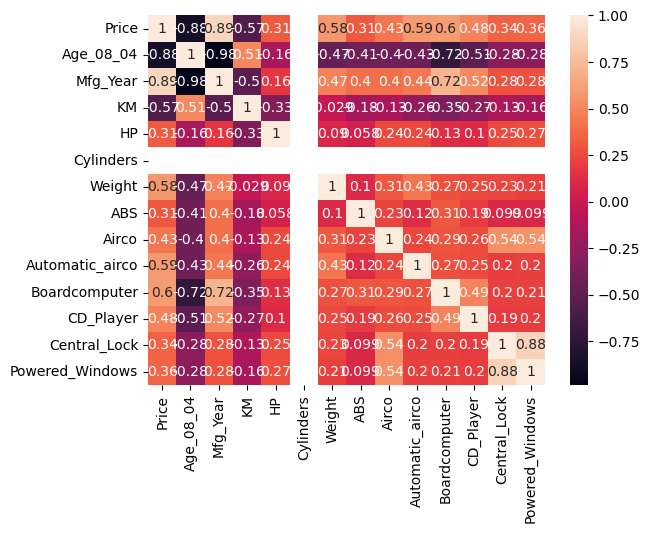

In [170]:
sns.heatmap(df.corr(),annot=True)

In [171]:
for i in df.columns:
    print({i:df[i].unique()})

{'Price': array([13500, 13750, 13950, 14950, 12950, 16900, 18600, 21500, 20950,
       19950, 19600, 22500, 22000, 22750, 17950, 16750, 16950, 15950,
       16250, 17495, 15750, 15500, 14750, 19000, 15800, 21950, 20500,
       13250, 15250, 18950, 15999, 16500, 18750, 22250, 12995, 18450,
       16895, 14900, 17250, 15450, 16650, 17450, 16450, 18900, 18990,
       18500, 19450, 18800, 32500, 31000, 31275, 24950, 22950, 24990,
       17900, 19250, 16350, 21750, 15850, 23000, 19900, 23950, 24500,
       17200, 19500, 16868, 19750, 20750, 17650, 17795, 18245, 23750,
       18700, 21125,  6950,  9500, 11950,  7750,  4350,  4750, 11750,
       11900,  9950, 11495, 11250, 10500, 10450, 11500, 12500, 10950,
       11450, 11790, 12450, 11690, 12750, 11925, 12900, 11650, 10850,
        9940, 13450, 12495, 12000, 11480, 14990, 12850, 11700, 11895,
       13875, 12295, 13995,  9900, 11990, 10750, 11695, 11000, 12400,
       12200, 12695, 14350, 10250,  6500,  6400,  7000,  8900,  8500,
        89

In [172]:
cat_col = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat_col.append(i)
cat_col

['Fuel_Type', 'Color']

In [173]:
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Feature : ", col)
    print("Mapping : ", le_name_mapping)

Feature :  Fuel_Type
Mapping :  {'CNG': 0, 'Diesel': 1, 'Petrol': 2}
Feature :  Color
Mapping :  {'Beige': 0, 'Black': 1, 'Blue': 2, 'Green': 3, 'Grey': 4, 'Red': 5, 'Silver': 6, 'Violet': 7, 'White': 8, 'Yellow': 9}


<Axes: xlabel='Id'>

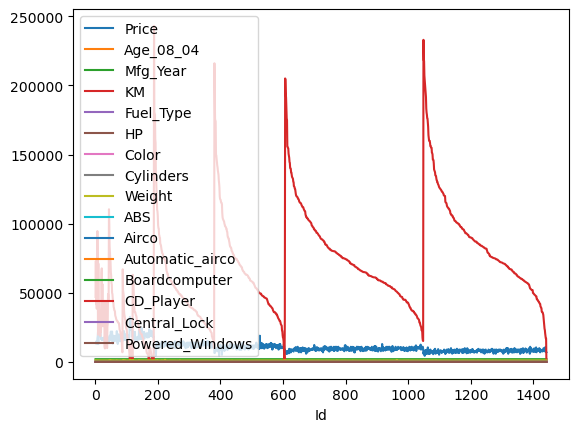

In [174]:
df.plot()

In [175]:
# sns.pairplot(df)

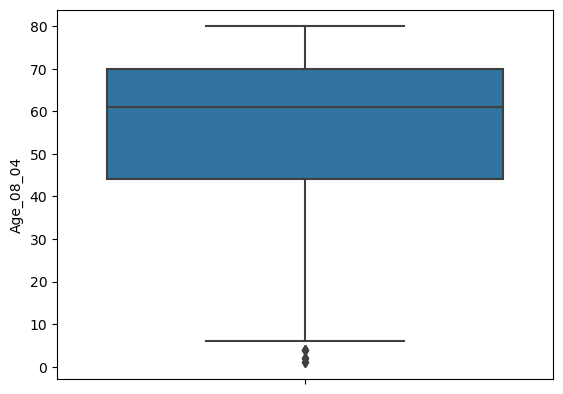

In [176]:
sns.boxplot(y=df['Age_08_04'], orient='vertical')
df = df[df['Age_08_04'] >= 8 ]

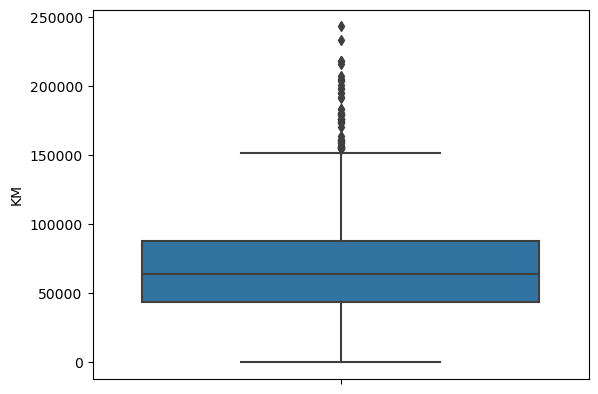

In [177]:
sns.boxplot(y=df['KM'], orient='vertical')
df = df[df['KM'] >= 150000 ]

<Axes: ylabel='Color'>

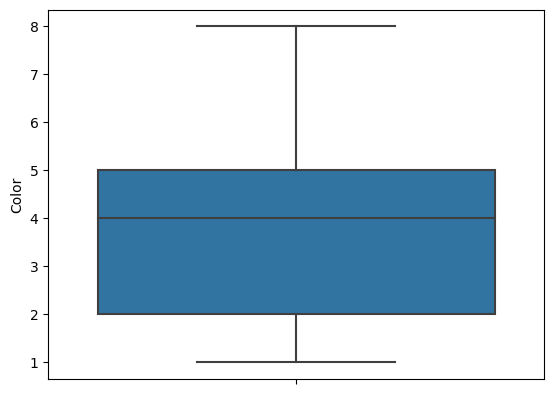

In [178]:
sns.boxplot(y=df['Color'], orient='vertical')

<Axes: ylabel='Weight'>

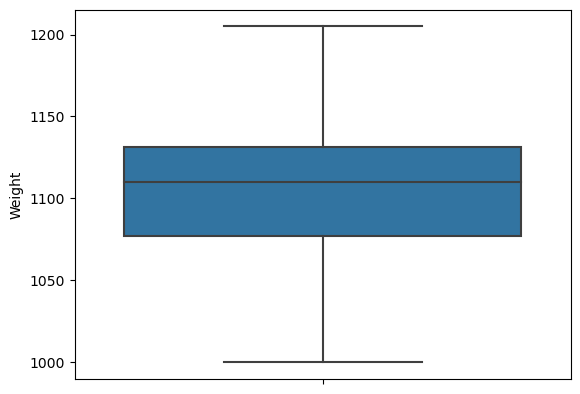

In [179]:
sns.boxplot(y=df['Weight'], orient='vertical')


In [180]:
np.log(df)

c:\Users\amalp\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,Color,Cylinders,Weight,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows
Id,,,,,,,,,,,,,,,,
188,8.846497,3.761200,7.601402,12.400817,0.000000,4.234107,2.079442,1.386294,7.012115,0.0,0.0,-inf,-inf,-inf,0.0,0.0
189,9.159047,3.637586,7.601402,12.104250,0.000000,4.499810,1.609438,1.386294,7.056175,0.0,0.0,-inf,0.0,-inf,0.0,0.0
190,9.388487,3.688879,7.601402,12.099934,0.000000,4.499810,0.693147,1.386294,7.094235,0.0,0.0,-inf,0.0,0.0,0.0,0.0
191,8.955448,3.761200,7.601402,12.094347,-inf,4.700480,2.079442,1.386294,6.988413,0.0,-inf,-inf,0.0,-inf,-inf,-inf
192,9.388487,3.688879,7.601402,11.989160,0.000000,4.234107,1.386294,1.386294,7.007601,0.0,-inf,-inf,0.0,0.0,0.0,-inf
193,8.377931,3.784190,7.601402,11.972374,0.000000,4.234107,2.079442,1.386294,7.012115,0.0,-inf,-inf,0.0,-inf,0.0,0.0
381,8.779557,3.970292,7.600902,12.283034,0.000000,4.234107,2.079442,1.386294,7.012115,0.0,0.0,-inf,0.0,-inf,0.0,0.0
382,8.764053,3.931826,7.600902,12.196865,0.000000,4.234107,1.609438,1.386294,6.998510,0.0,0.0,-inf,-inf,-inf,0.0,0.0
383,8.853665,3.970292,7.600902,12.078239,0.000000,4.234107,0.693147,1.386294,7.007601,0.0,0.0,-inf,0.0,-inf,-inf,-inf


In [181]:
np.exp(df)

c:\Users\amalp\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,Color,Cylinders,Weight,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows
Id,,,,,,,,,,,,,,,,
188,inf,4.727839e+18,inf,inf,2.718282,9.253782e+29,2980.957987,54.59815,inf,2.718282,2.718282,1.0,1.000000,1.000000,2.718282,2.718282
189,inf,3.185593e+16,inf,inf,2.718282,1.220403e+39,148.413159,54.59815,inf,2.718282,2.718282,1.0,2.718282,1.000000,2.718282,2.718282
190,inf,2.353853e+17,inf,inf,2.718282,1.220403e+39,7.389056,54.59815,inf,2.718282,2.718282,1.0,2.718282,2.718282,2.718282,2.718282
191,inf,4.727839e+18,inf,inf,1.000000,5.920972e+47,2980.957987,54.59815,inf,2.718282,1.000000,1.0,2.718282,1.000000,1.000000,1.000000
192,inf,2.353853e+17,inf,inf,2.718282,9.253782e+29,54.598150,54.59815,inf,2.718282,1.000000,1.0,2.718282,2.718282,2.718282,1.000000
193,inf,1.285160e+19,inf,inf,2.718282,9.253782e+29,2980.957987,54.59815,inf,2.718282,1.000000,1.0,2.718282,1.000000,2.718282,2.718282
381,inf,1.041376e+23,inf,inf,2.718282,9.253782e+29,2980.957987,54.59815,inf,2.718282,2.718282,1.0,2.718282,1.000000,2.718282,2.718282
382,inf,1.409349e+22,inf,inf,2.718282,9.253782e+29,148.413159,54.59815,inf,2.718282,2.718282,1.0,1.000000,1.000000,2.718282,2.718282
383,inf,1.041376e+23,inf,inf,2.718282,9.253782e+29,7.389056,54.59815,inf,2.718282,2.718282,1.0,2.718282,1.000000,1.000000,1.000000


In [182]:
df_sqrt = df.copy()
for column in df_sqrt.columns:
    if column != 'Price':
        df_sqrt[column] = np.sqrt(df_sqrt[column])
df_sqrt

,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,Color,Cylinders,Weight,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows
Id,,,,,,,,,,,,,,,,
188,6950,6.557439,44.732538,492.950302,1.000000,8.306624,2.828427,2.0,33.316662,1.0,1.0,0.0,0.0,0.0,1.0,1.0
189,9500,6.164414,44.732538,425.015294,1.000000,9.486833,2.236068,2.0,34.058773,1.0,1.0,0.0,1.0,0.0,1.0,1.0
190,11950,6.324555,44.732538,424.099045,1.000000,9.486833,1.414214,2.0,34.713110,1.0,1.0,0.0,1.0,1.0,1.0,1.0
191,7750,6.557439,44.732538,422.916067,0.000000,10.488088,2.828427,2.0,32.924155,1.0,0.0,0.0,1.0,0.0,0.0,0.0
192,11950,6.324555,44.732538,401.248053,1.000000,8.306624,2.000000,2.0,33.241540,1.0,0.0,0.0,1.0,1.0,1.0,0.0
193,4350,6.633250,44.732538,397.894458,1.000000,8.306624,2.828427,2.0,33.316662,1.0,0.0,0.0,1.0,0.0,1.0,1.0
381,6500,7.280110,44.721360,464.758002,1.000000,8.306624,2.828427,2.0,33.316662,1.0,1.0,0.0,1.0,0.0,1.0,1.0
382,6400,7.141428,44.721360,445.159522,1.000000,8.306624,2.236068,2.0,33.090784,1.0,1.0,0.0,0.0,0.0,1.0,1.0
383,7000,7.280110,44.721360,419.523539,1.000000,8.306624,1.414214,2.0,33.241540,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [183]:
X = df[['Age_08_04', 'Mfg_Year', 'KM',
       'Cylinders', 'Weight' ,'Automatic_airco',
       'Boardcomputer','Fuel_Type','ABS','HP','Central_Lock','Powered_Windows','CD_Player','Airco','Color']]
Y = df[['Price']]

X_sqrt = df_sqrt[['Age_08_04', 'Mfg_Year', 'KM',
       'Cylinders', 'Weight', 'Automatic_airco',
       'Boardcomputer','Fuel_Type','ABS','HP','Central_Lock','Powered_Windows','CD_Player','Airco','Color']]
Y_sqrt = df_sqrt[['Price']]

In [184]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[-1.91954151e+00,  2.15665546e+00,  2.87174478e+00,
         0.00000000e+00,  2.29318123e-01,  0.00000000e+00,
        -3.85922492e-01, -3.11085508e-01,  5.91607978e-01,
        -8.12932312e-01,  9.63624112e-01,  1.16095912e+00,
        -2.82842712e-01,  1.00000000e+00,  1.94817786e+00],
       [-2.33251060e+00,  2.15665546e+00,  1.37124532e-01,
         0.00000000e+00,  1.38446538e+00,  0.00000000e+00,
         2.59119388e+00, -3.11085508e-01,  5.91607978e-01,
         5.94495538e-01,  9.63624112e-01,  1.16095912e+00,
        -2.82842712e-01,  1.00000000e+00,  5.69990902e-01],
       [-2.16732297e+00,  2.15665546e+00,  1.03008652e-01,
         0.00000000e+00,  2.42409792e+00,  0.00000000e+00,
         2.59119388e+00, -3.11085508e-01,  5.91607978e-01,
         5.94495538e-01,  9.63624112e-01,  1.16095912e+00,
         3.53553391e+00,  1.00000000e+00, -8.08196056e-01],
       [-1.91954151e+00,  2.15665546e+00,  5.90702037e-02,
         0.00000000e+00, -3.71358453e-01,  0.00000000

In [185]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
x_sqrt_train,x_sqrt_test,y_sqrt_train,y_sqrt_test = train_test_split(X_sqrt,Y_sqrt,test_size=0.2,random_state=10)

In [186]:
model = LinearRegression()
model_sqrt = LinearRegression()

In [187]:
model.fit(x_train,y_train)
model_sqrt.fit(x_sqrt_train,y_sqrt_train)

LinearRegression()

In [188]:
y_pred = model.predict(x_test)
y_pred_sqrt = model_sqrt.predict(x_sqrt_test)

In [189]:
print("No Transformation : ",model.score(x_train,y_train)*100)
print("Sqrt Transformation : ", model_sqrt.score(x_sqrt_train,y_sqrt_train)*100)

No Transformation :  62.04358332229778
Sqrt Transformation :  62.013265321162734


In [190]:
r2 = r2_score(y_test,y_pred)
r2_sqrt = r2_score(y_sqrt_test,y_pred_sqrt)

print("Normal r2 : ", r2)
print("Sqrt r2 : ", r2_sqrt)

Normal r2 :  -0.941667473257642
Sqrt r2 :  -0.9061431070535806
